In [19]:
include("cheb.jl")
include("solvers.jl")
include("CosmoTimeStepExpr.jl")
include("CosmoCoeffExpr.jl")
include("CosmoConstrExpr.jl")

T = BigFloat  # precision type (change here if needed)
setprecision(T, 512) 

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

const E = exp(T(1.));

const H = T(3.);
const Om = T(4.);
const tstar = T(1.);

In [5]:
Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;

zmin = T(1e-60);
zmax = T(.6);


DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

In [6]:
InitGuess = zeros(T,NVar,N);
zAH = T(0.5);
X = T(0.);
tinit = T(-3.)
p2 = 0;
inita4 = T(-100);
M  = T(1);
margin = 10;

In [7]:
X = T(.7);
Var = copy(InitGuess);

for ii in 1:200
    Var[2,1:N] = LinearSolveODE(Var, 1, inita4, X, tinit);
    Var[3,1:N] = LinearSolveODE(Var, 2, inita4, X, tinit);
    X = CorrectXi(Var, X, tinit, margin);
    print("\rX = $X")
    flush(stdout)
end

X = 1.232595201559296418598213036234791378778955935012347974163840307701614600302526891671085777707007502005619412825118488889477489896483196214476170570485733329

In [ ]:
# Having computed ξ(t_0), we change the grid so that it ends precisely at the apparent horizon, zmax = zAH
# This seemed to have made the code run better, but more testing would be good.

#Or let's try this instead.

initX = copy(X);

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1e-60);
zmax = T(.55);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

InitGuess = zeros(T,NVar,N);

In [10]:
InitVar = ComputeBulk(Var[1,1:N], initX, inita4, tinit);

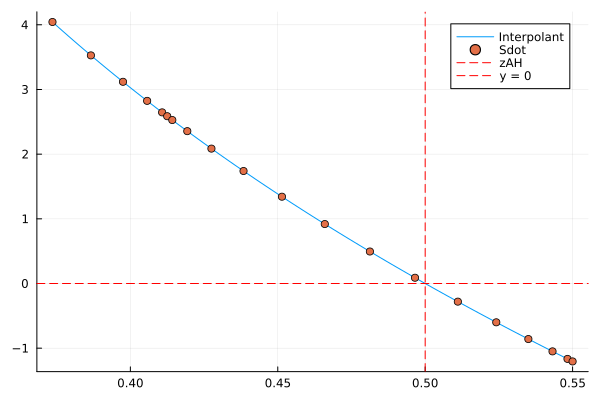

In [11]:
fig = PlotSdot(InitVar, initX,tinit, 40);
display(fig)

In [21]:
dt = T(.0005);

OutputArr = [];
MonitorArr = [];

Evolve(InitVar, initX, inita4, T(tinit), -1, dt, 20, OutputArr, MonitorArr)

◑ time = -1.000, constraint violation = 0.000    Time: 0:37:02

In [ ]:
# using Serialization

# open("cosmo_until_t_minus1.dat","w") do io
#     serialize(io, OutputArr);
# end

In [23]:
TimeArr = [x[1][1] for x in OutputArr];
XArr = [x[2][1] for x in OutputArr];

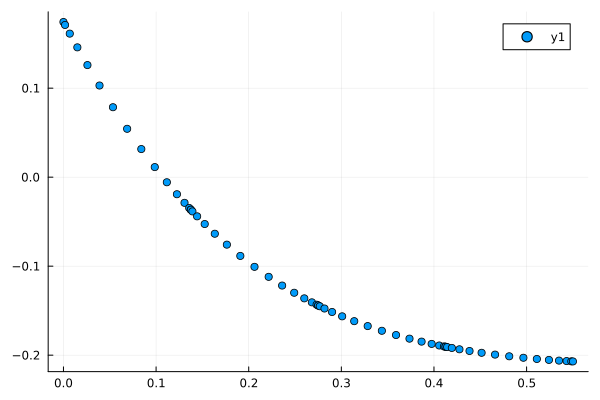

In [27]:
plt.scatter(grid,OutputArr[end][4][2,:])

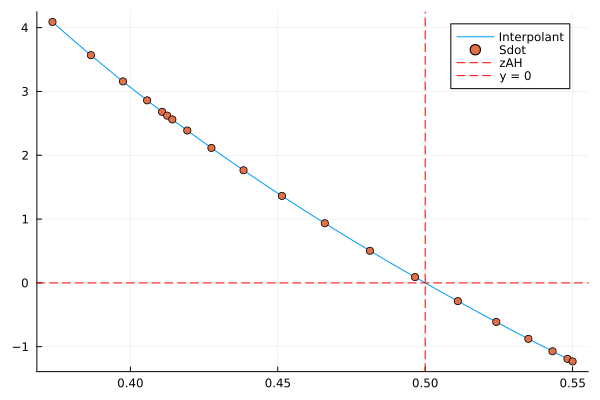

In [28]:
PlotSdot(OutputArr[end][4][:,:],XArr[end],TimeArr[end],40)

In [32]:
Energy = [x[1] for x in MonitorArr];
Momentum = [x[2] for x in MonitorArr];
Operator = [x[3] for x in MonitorArr];
Constraint = [x[4] for x in MonitorArr[2:end]];

In [42]:
VarM1 = copy(OutputArr[end][4][:,:]);
a4M1 = copy(OutputArr[end][3][1]);
XM1 = copy(OutputArr[end][2][1]);
tM1 = copy(OutputArr[end][1][1]);

In [ ]:
dt = T(.0005);

OutputArr = [];
MonitorArr = [];

Evolve(VarM1, XM1, a4M1, tM1, 5, dt, 20, OutputArr, MonitorArr)

◒ time = -0.843, constraint violation = 0.000    Time: 0:02:42